___
# Ciência dos Dados - PROJETO 1

## Milena Maluli                                                                                                                     -    2C

## Segurança Alimentar no Brasil

___
## Introdução

Esse estudo pretende analisar a segurança alimentar dos brasileiiros a partir de dados que relacionam renda e moradia. Analisa os brasileiros que declararam e possuem menor que 100000 reais mensais. O material de suas casas, a  presença de geladeira e água canalizada, são alguns aspectos da moradia que estão sendo estudados.
Alêm destes aspectos, é visto também a renda desses moradores e se eles já deixaram de comprar comida por falta de dinheiro. 

Para esse estudo, foi usado a PNAD de 2009 e 2013. Em 2009 o PIB brasileiro sofreu uma retração de 0,2%, devido a crise mundial. Já em 2013, o PIB cresceu em 2,3%. A comparação da segurança alimentar nesses dois periodos permite averiguar as interferências da economia na vida da população, e se, realmente, as condições de vida das pessoas tem melhorado e a segurança alimentar aumentado.

Para traçar esse perfil do brasileiro que sofre insegurança alimentar, foi relacionado o material da casa e a renda da pessoa que ficou sem alimento por não ter dinheiro para comprá-lo. Também foi relacionada sua renda e o fato desta pessoa já ter sentido fome, mesmo com a presença de geladeira e água canalizada na casa. Essas comparações permitem analisar como a estrutura da casa do brasileiro, desde seu material quanto aos recursos que tem nela, se relacionam com a segurança alimentar.

___
## Análise e Resultados

### Base de Dados

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [43]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\milen\OneDrive\Documentos\2o SEMESTRE\CDD\CD


In [44]:
dados=pd.read_csv('DOM2009csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados2=pd.read_csv('DOM2013csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [45]:
#2009
dados.V4621 = dados.V4621.astype('float')
dados.V2117 = dados.V2117.astype('category')
dados.V2132 = dados.V2132.astype('category')
dados.V0203 = dados.V0203.astype('category')
dados.V0221 = dados.V0221.astype('category')
dados.V2105 = dados.V2105.astype('category')
dados.V0228 = dados.V0228.astype('category')

In [46]:
#2013

dados2.V4621 = dados.V4621.astype('float')
dados2.V2117 = dados.V2117.astype('category')
dados2.V2132 = dados.V2132.astype('category')
dados2.V0203 = dados.V0203.astype('category')
dados2.V0221 = dados.V0221.astype('category')
dados2.V2105 = dados.V2105.astype('category')
dados2.V0228 = dados.V0228.astype('category')

In [47]:
#2009

dados.V2117.cat.categories = (['Sim', 'Nao'])
dados.V2132.cat.categories = (['Sim', 'Nao'])
dados.V0203.cat.categories = (['Alven', 'Mad Aparelhada', 'Taipa','Mad Aproveitada','Palha','Outro Material'])
dados.V0221.cat.categories = (['Sim', 'Nao'])
dados.V2105.cat.categories = (['Sim', 'Nao'])
dados.V0228.cat.categories = (['Sim, 2portas', 'Sim, 1porta','Nao'])
dados.V2117.cat.categories = (['Sim', 'Nao'])


In [48]:
#2013

dados2.V2117.cat.categories = (['Sim', 'Nao'])
dados2.V2132.cat.categories = (['Sim', 'Nao'])
dados2.V0203.cat.categories = (['Alven', 'Mad Aparelhada', 'Taipa','Mad Aproveitada','Palha','Outro Material'])
dados2.V0221.cat.categories = (['Sim', 'Nao'])
dados2.V2105.cat.categories = (['Sim', 'Nao'])
dados2.V0228.cat.categories = (['Sim, 2portas', 'Sim, 1porta','Nao'])
dados2.V2117.cat.categories = (['Sim', 'Nao'])


In [49]:
d= dados.loc[:,["V4621","V0203","V0221","V0228","V2117","V2105"]]
d2=dados2.loc[:,["V4621","V0203","V0221","V0228","V2117","V2105"]]

In [50]:
print('2009')
d.columns = ['RENDA','MATERIAL', 'AGUA', 'GELADEIRA','SENTIUFOME','FALTAAL']
d=d.dropna(subset=['RENDA'])
d=d[d.RENDA<100000]
d.head()

2009


,RENDA,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL
2,118.0,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim
3,1053.0,Alven,Sim,"Sim, 2portas",NaN,Nao
4,930.0,Alven,Sim,"Sim, 1porta",NaN,Nao
6,232.0,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao
7,248.0,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao


In [51]:
d.describe()

,RENDA
count,117827.000000
mean,760.880605
std,1355.601794
min,0.000000
25%,232.000000
50%,451.000000
75%,797.000000
max,94669.000000


In [52]:
print('2013')
d2.columns = ['RENDA','MATERIAL', 'AGUA', 'GELADEIRA','SENTIUFOME','FALTAAL']
d2=d2.dropna(subset=['RENDA'])
d2=d2[d2.RENDA<100000]
d2.head()


2013


,RENDA,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL
2,118.0,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim
3,1053.0,Alven,Sim,"Sim, 2portas",NaN,Nao
4,930.0,Alven,Sim,"Sim, 1porta",NaN,Nao
6,232.0,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao
7,248.0,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao


In [53]:
d2.describe()

,RENDA
count,113705.000000
mean,734.821485
std,1279.015057
min,0.000000
25%,232.000000
50%,450.000000
75%,775.000000
max,94669.000000


In [54]:
d.to_csv('DataFramee1.csv', sep=';')


### MATERIAL DA CASA X CARÊNCIA DE ALIMENTO POR FALTA DE DINHEIRO


 A análise do material da casa do brasileiro e se nessa casa já faltou alimento por não ter dinheiro para comprá-lo permite entender qual o tipo de casa em que a insegurança alimentar está mais presente.


Qual a relação do material da casa e a quantidade de pessoas que tem carência de alimento por não poder comprar? 
Tem casas feitas de material mais caro mas que, mesmo assim, sentem falta de alimento por não ter dinheiro?
Qual o material utilizado na construção da casa em que mais ocorre a carência de alimento por falta de dinheiro?

In [55]:
#ANÁLISE SÓ DE 2009
ctrf= (pd.crosstab(d.MATERIAL,d.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
print(ctrf)

Falta al por $         Sim        Nao
MATERIAL                             
Alven            16.683853  83.316147
Mad Aparelhada   20.882921  79.117079
Taipa            53.185328  46.814672
Mad Aproveitada  37.795276  62.204724
Palha            38.888889  61.111111
Outro Material   34.391534  65.608466
All              17.532042  82.467958


In [56]:
#ANÁLISE SÓ DE 2013
ctrf2= (pd.crosstab(d2.MATERIAL,d2.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
print(ctrf2)

Falta al por $         Sim        Nao
MATERIAL                             
Alven            16.857238  83.142762
Mad Aparelhada   20.904645  79.095355
Taipa            53.236715  46.763285
Mad Aproveitada  37.634409  62.365591
Palha            38.888889  61.111111
Outro Material   34.574468  65.425532
All              17.715338  82.284662


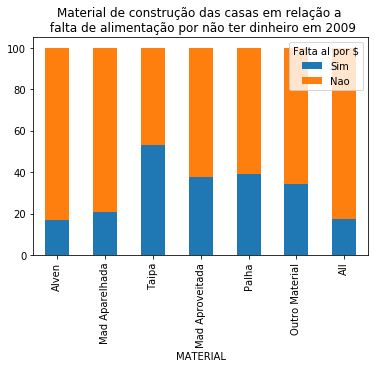

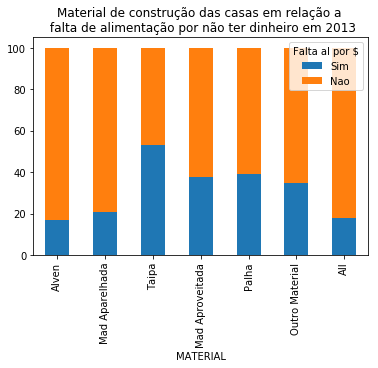

In [57]:
#Comparação
ctrf= (pd.crosstab(d.MATERIAL,d.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
ctrf.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2009')

ctrf2= (pd.crosstab(d2.MATERIAL,d2.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
ctrf2.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2013')

   As casas feitas de Alvenaria são as que apresentam menor índice de carência de alimento por não ter dinheiro, enquanto as casas de Taipa apresentam uma grande porcentagem de pessoas que deixaram de comprar alimentos por não terem dinheiro. Pode-se pereceber que quanto melhor o material da casa, menor o numero de pessoas que deixaram de comprar comida pela falta de dinheiro. Além disso, pode-se perceber que a diferença entre 2009 e 2013 foi muito pequena, a melhora na economia não afetou um grupo significativo de pessoas, fazendo com que não seja significativa essa diferença, pela análise do gráfico.

### RENDA X CARÊNCIA DE ALIMENTO POR FALTA DINHEIRO

Essa relação da renda da pessoa e se já faltou alimento em sua casa por não ter dinheiro para comprá-lo, permite analisar se, realmente, quanto maior a renda mais condições a pessoa tem de comprar alimento. Também é observado se a melhora na economia incentivou um aumento na renda dos brasileiros.




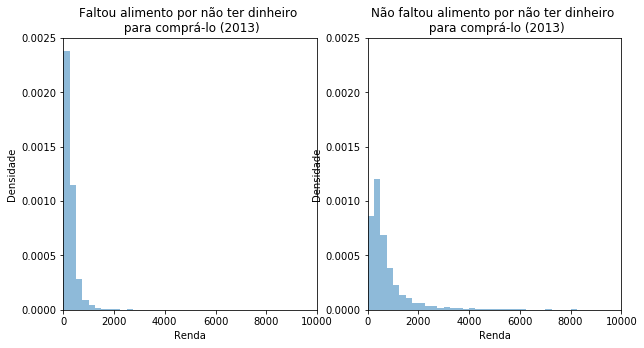

In [58]:
#ANÁLISE SÓ DE 2013
faixa = arange(0,100000,250)

plt.subplot(121)
plot = d2.RENDA[d2.FALTAAL=='Sim'].plot.hist(bins=faixa,title='HISTOGRAMA FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Faltou alimento por não ter dinheiro \n para comprá-lo (2013)')

plt.subplot(122)
plot = d2.RENDA[d2.FALTAAL=='Nao'].plot.hist(bins=faixa,title='HISTOGRAMA SEM FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Não faltou alimento por não ter dinheiro \n para comprá-lo (2013)')

Observando os gráficos acima, podemos perceber que a maior quantidade de dados estão localizados no intervalo de renda(0,5000). Para uma melhor interpretação e comparação dos dados será adotado um limite nessa faixa.

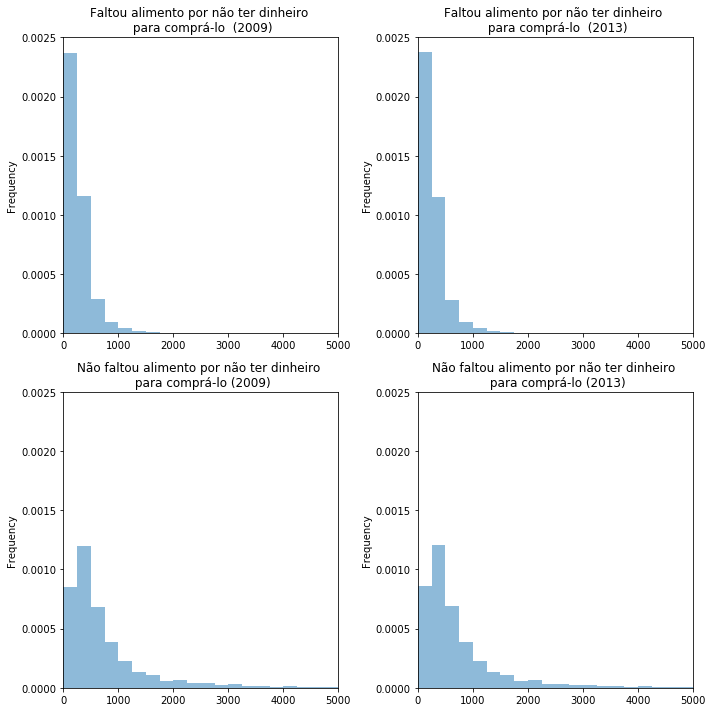

In [59]:
#COMPARAÇÃO
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plot = d.RENDA[d.FALTAAL=='Sim'].plot.hist(bins=faixa,title='Faltou alimento por não ter dinheiro \n para comprá-lo  (2009)', normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.subplot(222)
plot = d2.RENDA[d2.FALTAAL=='Sim'].plot.hist(bins=faixa,title='Faltou alimento por não ter dinheiro \n para comprá-lo  (2013)', normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.subplot(223)
plot = d.RENDA[d.FALTAAL=='Nao'].plot.hist(bins=faixa,title='Não faltou alimento por não ter dinheiro \n para comprá-lo (2009)', normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.subplot(224)
plot = d2.RENDA[d2.FALTAAL=='Nao'].plot.hist(bins=faixa,title='Não faltou alimento por não ter dinheiro \n para comprá-lo (2013)',normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.tight_layout()
plt.show()

Pode-se perceber que a maior quantidade de que pessoas sofreram falta de alimento por não ter dinheiro para comprá-lo se encontram na faixa de 0 a 1000 reais. A frequência máxima é de aproximadamente 0,0024 , na faixa de 0 a 250 reais. As pessoas em que a falta de alimento não se deu por não ter dinhero para comprar se apresentam em diversas faixas de renda, sendo mais espalhadas, chegando até 4500, aproximadamente. Essas apresentam uma frequência máxima de aproximadamente 0,0012, na faixa de 250 a 500 reais.

A comparação entre esses gráficos mostra que a carência de alimento pela falta de dinheiro está mais concentrada nas pessoas de menor renda e que de 2009 e 2013 a melhora na economia não atingiu um número significativo de pessoas para que o gráfico fosse visivelmente alterado.


### RENDA  X   ÁGUA + GELADEIRA

Essa análise relaciona a renda com a presença de geladeira e água canalizada na casa. Foi criada uma variável INFRAESTRUTURA que abrange a presença desses dois aspectos na casa.

In [60]:
#INFRAESTRUTURA

d.loc[(d.AGUA=='Sim') & (d.GELADEIRA=='Sim, 2portas'),'INFRAESTRUTURA'] = 'Sim'
d.loc[(d.AGUA=='Sim') & (d.GELADEIRA=='Sim, 1porta'),'INFRAESTRUTURA'] = 'Sim'
d.loc[(d.AGUA=='Nao') | (d.GELADEIRA=='Nao'),'INFRAESTRUTURA'] = 'Nao'
d.head()

,RENDA,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL,INFRAESTRUTURA
2,118.0,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim,Sim
3,1053.0,Alven,Sim,"Sim, 2portas",NaN,Nao,Sim
4,930.0,Alven,Sim,"Sim, 1porta",NaN,Nao,Sim
6,232.0,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao,Sim
7,248.0,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao,Sim


In [61]:
#INFRAESTRUTURA
d2.loc[(d2.AGUA=='Sim') & (d2.GELADEIRA=='Sim, 2portas'),'INFRAESTRUTURA'] = 'Sim'
d2.loc[(d2.AGUA=='Sim') & (d2.GELADEIRA=='Sim, 1porta'),'INFRAESTRUTURA'] = 'Sim'
d2.loc[(d2.AGUA=='Nao') | (d2.GELADEIRA=='Nao'),'INFRAESTRUTURA'] = 'Nao'
d2.head()

,RENDA,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL,INFRAESTRUTURA
2,118.0,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim,Sim
3,1053.0,Alven,Sim,"Sim, 2portas",NaN,Nao,Sim
4,930.0,Alven,Sim,"Sim, 1porta",NaN,Nao,Sim
6,232.0,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao,Sim
7,248.0,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao,Sim


In [62]:
#RENDA
d.RENDA.describe()

count    117827.000000
mean        760.880605
std        1355.601794
min           0.000000
25%         232.000000
50%         451.000000
75%         797.000000
max       94669.000000
Name: RENDA, dtype: float64

Ao tabelar os valores de renda, adotei rendas menores que 500000 reais. Por perceber que o valor máximo era de 94669 reais, determinei como limite de renda o 100000 reais. 

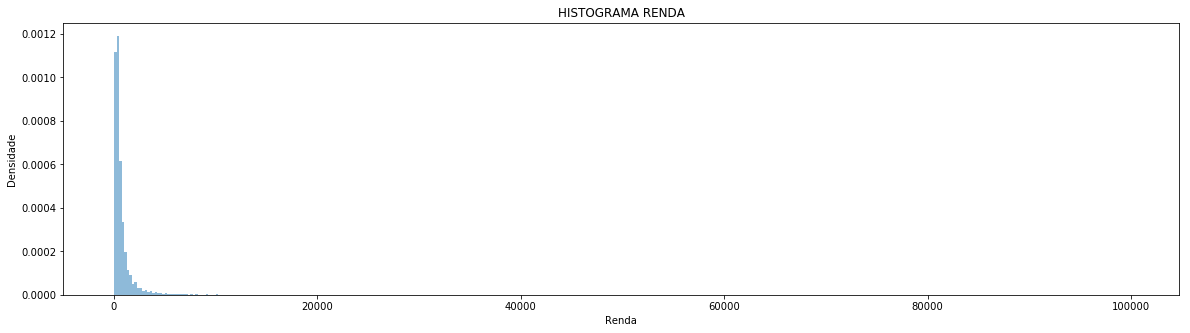

In [63]:
# k= raiz de 121163 = 348 = 350
# amplitude= 94669
#270 
faixa = arange(0,100000,250)

plot = d.RENDA.plot.hist(bins=faixa,title='HISTOGRAMA RENDA',figsize=(20,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

Para uma melhor interpretação, foi diminuido o limite da faixa de renda.

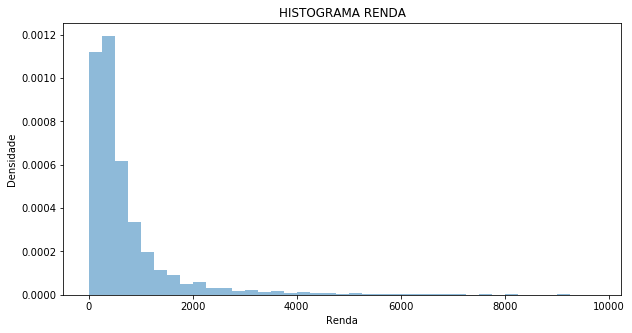

In [64]:
faixa = arange(0,10000,250)

plot = d.RENDA.plot.hist(bins=faixa,title='HISTOGRAMA RENDA',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

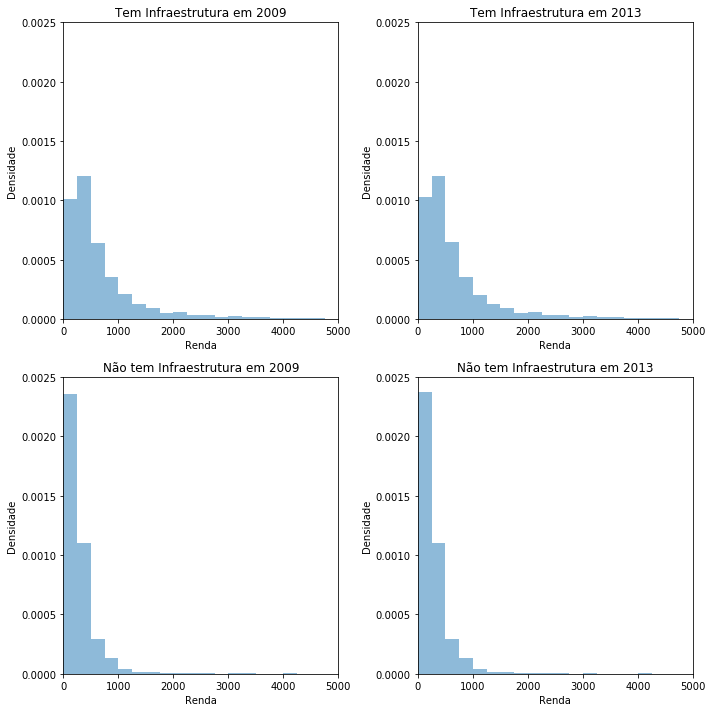

In [65]:
#COMPARAÇÃO
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plot = d.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2009', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.subplot(222)
plot = d2.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2013', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.subplot(223)
plot = d.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2009', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.subplot(224)
plot = d2.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2013', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.tight_layout()
plt.show()

Pode-se perceber que as pessoas que não tem infraestrutura estão localizadas nas faixas de menor renda, principalemte de 0 a 500 reais, aproximadamente. Já as que possuem infraestrutura estão mais distribuidas entre as faixas de renda, principalmente entre 0 a 750 reais.
Uma maior densidade populacional possui infraestrutura entre as faixas de 0 a 5000 reais, mas há uma maior densidade de pessoas sem infraestrutura na faixa de 0 a 250 reais.

### FOME X INFRAESTRUTURA

Ao relacionar se a pessoa ja sentiu fome, mesmo tendo em suas casas a presença de geladeira e água canalizada, permite averiguar se ter essa infraestrutura ajuda a cuidar e a armazenar alimentos, evitando com que a pessoa sinta fome.

In [66]:
d.SENTIUFOME.value_counts()

Nao    30264
Sim     7415
Name: SENTIUFOME, dtype: int64

In [67]:
#ANÁLISE SÓ DE 2009

ctgf= (pd.crosstab(d.INFRAESTRUTURA,d.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
print(ctgf)

Sentiu fome?                      Sim        Nao
Presença de Infraestrutura                      
Nao                         36.108263  63.891737
Sim                         17.183297  82.816703
All                         19.638724  80.361276


In [68]:
#ANÁLISE SÓ DE 2013

ctgf2= (pd.crosstab(d2.INFRAESTRUTURA,d2.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
print(ctgf2)

Sentiu fome?                      Sim        Nao
Presença de Infraestrutura                      
Nao                         36.158309  63.841691
Sim                         17.288765  82.711235
All                         19.775029  80.224971


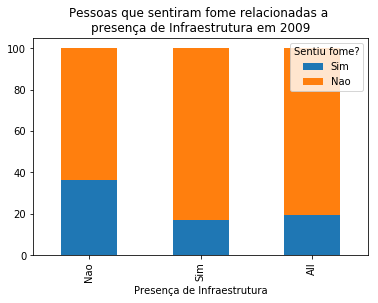

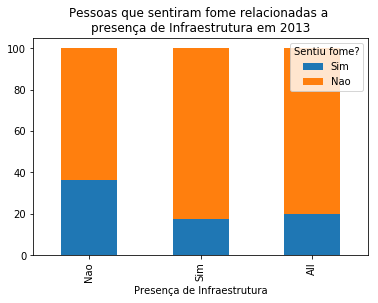

In [69]:
ctgf= (pd.crosstab(d.INFRAESTRUTURA,d.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
ctgf.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome relacionadas a \npresença de Infraestrutura em 2009')

ctgf2= (pd.crosstab(d2.INFRAESTRUTURA,d2.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
ctgf2.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome relacionadas a \npresença de Infraestrutura em 2013')

A análise dos gráficos mostra que nas casas onde há infraestrutura é menor a porcentagem de pessoas que sentem fome,se comparadas a quem não tem infraestrutura.

___
## Conclusão 

  Ao analisar os diferentes tipos de gráficos feitos de variáveis das PNAD 2009 e a 2013, pode-se perceber que a insegurança alimentar brasileira está relacionada tanto ao material com o qual a casa foi construida, quanto a presença de água canalizada.
  
  Sobre o material de contrução, as casas feitas de Alvenaria são as que apresentam menor índice de carência de alimento por falta de dinheiro, enquanto as casas de Taipa apresentam o maior. Pode-se pereceber que quanto melhor o material da casa, menor o numero de pessoas que deixaram de comprar comida pela falta de dinheiro. 
   Observando a renda, pode-se perceber que a maioria das pessoas que sofreram essa falta de alimento se encontram nas faixas de menor renda. As pessoas em que a falta de alimento não se deu por não ter dinhero para comprar se apresentam em diversas faixas de renda. Estão mais espalhadas e presentes também nas faixas de maior renda (até 5000 reais). Assim, a carência de alimento pela falta de dinheiro está mais concentrada nas pessoas de menor renda.
    Em relação a infraestrutura, as pessoas que não a tem são as de menor renda, diferente das que possuem, que estão mais distribuidas pelas diferentes faixas de renda.Também, nas casas onde há infraestrutura, é menor a porcentagem de pessoas que sentem fome, se comparadas a quem não tem infraestrutura.

   Ao analisar as características de cada ano, é possíver perceber que a média de renda em 2009, 760.88 reais, é maior que a de 2013, que é 734.82 reais. Porém, o desvio padrão de 2009 é maior que o de 2013, 1355.60 e 1279.01, respectivamente. Assim, mesmo havendo uma melhora na situação econômica da população, a diferença entre 2009 e 2013 foi muito pequena, e a melhora na economia não afetou um grupo significativo de pessoas, fazendo com que não seja significativa essa diferença, pela análise do gráfico. 
